Imports

Imports

In [1]:
#############
###paths#####
#############
import sys
import os

from importlib_metadata import distribution
pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
sys.path.append(modellingpath + '/lib')
#############

from numerical.cn_plot import plot1D, surfpattern
from numerical.countPeaksAnalysisFunctions import countPeaks, varPeakDistFunction
from numerical.generalFunctions import round_it

from analytical.linear_stability_analysis import detailed_turing_analysis_dict
from randomfunctions import plot_all_dispersion

from scipy.signal import find_peaks
import pickle
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm



Defining run parameters

In [2]:
circuit_n='turinghill'
variant= 0
n_species=2
mechanism='nogrowth'
L=50; x_gridpoints=5; J=L*x_gridpoints;I=J 
T=5000; t_gridpoints = 30; N=T*t_gridpoints #Number of timepoints
filename= lambda parID: '%s_variant%s_%s_ID%s_L%r_J%r_T%r_N%r'%(circuit_n,variant,mechanism,parID,L,J,T,N)
n_param_sets=2000000
lsa_df= pickle.load( open(modellingpath + '/growth/out/analytical/lsa_dataframes/lsa_df_%s_variant%r_%rparametersets.pkl'%(circuit_n,variant,n_param_sets), "rb"))
single_lsa_df =  lsa_df.xs(0, level=1)



In [3]:
instability_df= pickle.load( open(modellingpath + '/growth/out/analytical/instability/instability_df_%s_variant%r_%rparametersets.pkl'%(circuit_n,variant,n_param_sets), "rb"))
print(instability_df['system_class'].value_counts())
print('')
turing_osc_df = instability_df[instability_df['system_class']=='turing I oscillatory']
print(turing_osc_df['system_class'].value_counts())
print()
turing_hopf_df = instability_df[instability_df['system_class']=='turing I hopf']
print(turing_hopf_df['system_class'].value_counts())
print()
hopf_df = instability_df[instability_df['system_class']=='hopf']
print(hopf_df['system_class'].value_counts())


hopf                    61890
turing I hopf            1047
turing I oscillatory       29
turing I                    2
Name: system_class, dtype: int64

turing I oscillatory    29
Name: system_class, dtype: int64

turing I hopf    1047
Name: system_class, dtype: int64

hopf    61890
Name: system_class, dtype: int64


In [ ]:
filename(1)

In [4]:
def parID_display(parID, L,J,T,round=False,crop=100,ss_n=0,single_lsa_df = single_lsa_df):
    #data
    U = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/data/2Dfinal_%s.pkl'%(circuit_n,mechanism,filename(parID)), 'rb'))
    #plot
    plot1D(U,round=round)

    plt.subplots(figsize=(10,4))

    #dispersion
    plt.subplot(121)
    parID_dispersion(parID,crop,ss_n)
    #convergence
    plt.subplot(122)

    parID_surfpattern(parID,L,J,T)
    plt.tight_layout()
    plt.show()
def parID_surfpattern(parID,L,J,T,record_every_x_hours = 10):
    #data 
    U_record = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/data/2Drecord_%s.pkl'%(circuit_n,mechanism,filename(parID)), 'rb'))
    
    #grids
    dx = float(L)/float(J-1)
    x_grid = np.array([j*dx for j in range(J)])
    reduced_t_grid = np.arange(0,T,record_every_x_hours) 

    #plot
    surfpattern(U_record, [x_grid, reduced_t_grid], 'linear',  morphogen=1, rate=0, savefig=False,filename='',logResults=False,normalize=False)


def parID_dispersion(parID,crop, ss_n):
    #dispersion
    par_dict = single_lsa_df.loc[parID].to_dict() #converts a dataframe row into a dictionary outputing a dictionary for a specific parameter set
    out = detailed_turing_analysis_dict(par_dict, circuit_n, n_species)
    plot_all_dispersion(out[-3][ss_n],2, crop=crop)


Hopf

In [ ]:

for parID in list(hopf_df.index)[:10]:
    print(parID)
    parID_display(parID,L,J,T, crop=150)
    print('--------------------------------------')


Turing I hopf

In [ ]:

for parID in list(turing_hopf_df.index[:10]):
    print(parID)
    parID_display(parID,L,J,T, crop=10)
    print('--------------------------------------')

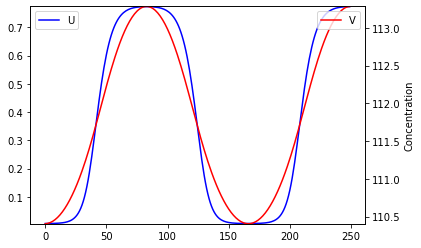

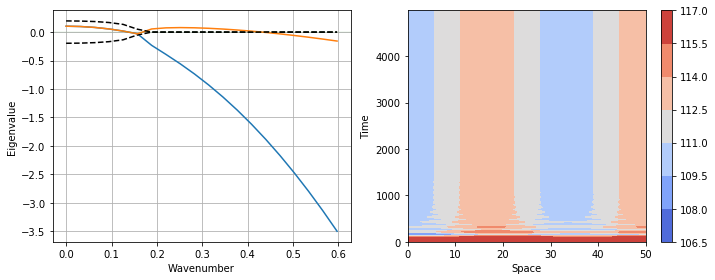

In [6]:
parID_display(193560,L,J,T, crop=20)


Turing I

In [ ]:

for parID in list(turing_osc_df.index):
    print(parID)
    parID_display(parID,L,J,T, crop=25)
    print('--------------------------------------')

In [ ]:
lsa_df.loc[118941]

Hopf

In [ ]:
parID_display(10524,L,J,T, crop=50)

In [ ]:

parID_display(3676, crop=20)

Stable

In [ ]:
simple_real_df = 

In [ ]:
stable_patterns_df = psEntropy_df.loc[(psEntropy_df['system_class'] == 'simple stable') & (psEntropy_df['psEntropy'] < 5.517) & (psEntropy_df['psEntropy'] != 0) & (psEntropy_df['complex_dispersion'] == False)]
# stable_patterns_df = psEntropy_df.loc[(psEntropy_df['system_class'] == 'simple stable') & (psEntropy_df['psEntropy'] < 5.517) & (psEntropy_df['psEntropy'] != 0)]
# print(len(stable_patterns_df.index[10:20]))
# for parID in stable_patterns_df.index:
#     print(parID)
#     parID_display(parID,L,J,T, crop=150)
#     print('--------------------------------------')
stable_patterns_df
lsa_df.loc[840]

In [ ]:
parID_display(840,L,J,T, crop=150)

In [ ]:
parID_display(591,L,J,T, crop=10)
U = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/data/2Dfinal_%s.pkl'%(circuit_n,mechanism,filename(591)), 'rb'))
U = [[round_it(Uxx,3) for Uxx in Ux] for Ux in U]
plt.plot(U[1])

In [ ]:

parID_display(16261, crop=5)


In [ ]:

parID_display(323,crop=30)


In [ ]:
parID_display(18689)


In [ ]:

parID_display(3580)


In [ ]:

parID_display( 28817,crop=200)


In [ ]:

parID = 9387
parID_display(parID,L,J,T)

In [ ]:


parID = 4162
parID_display(parID)

In [ ]:


parID = 2
parID_display(parID)

In [ ]:


parID = 3
parID_display(parID)

In [ ]:


parID = 99895
parID_display(parID)

In [ ]:
parID = 12464
parID_display(parID)

In [ ]:
parID = 44027
parID_display(parID,L,J,T, crop=100)